In [97]:




import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.axes as ax

In [98]:
df = pd.read_csv("BankChurners.csv")

In [99]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Data Cleansing 


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [78]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


Issue - What are the Key Value Drivers that impacts Attrition Flag so the company can target specific Demographics.

To gain an Understanding, we need to show the total Existing Customer / Attrited Customers

<Axes: xlabel='Attrition_Flag', ylabel='count'>

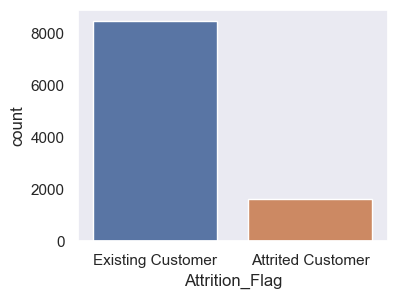

In [251]:
sns.countplot(data=df,x = 'Attrition_Flag')

Amongst the Total Existing Customer of both Gender, Show the Attrited Customer between male and female.

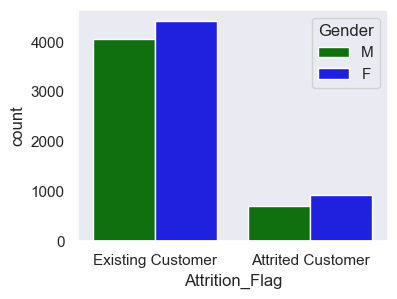

In [253]:
palette_colors = {"M": "green", "F": "blue"}

# count plot of existing Customer vs Attrited Customer
sns.countplot(x="Attrition_Flag", data=df,
              hue="Gender",
              palette=palette_colors)

# show plot
plt.show()

Depiction of the Customer ages and their salary Range. 

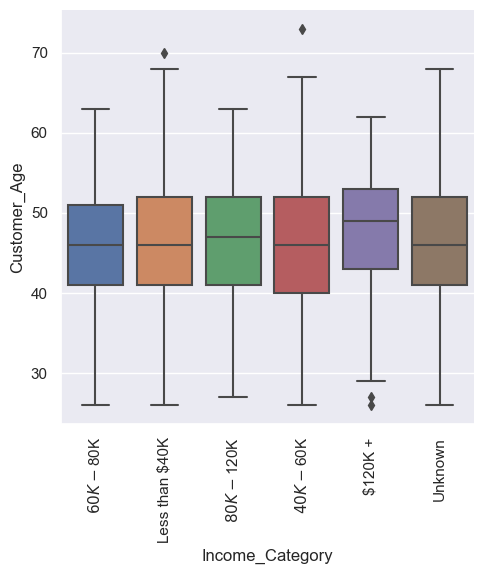

In [115]:
g = sns.catplot(x="Income_Category", y="Customer_Age",
            data=df, kind="box")
plt.xticks(rotation = 90)

# Show plot
plt.show()

Income Catageory of total Credit Card Customer. Most of the Credit Card are Utilized by the Customers that are 
earning Less than $40k

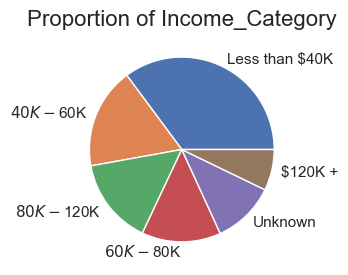

In [270]:
plt.pie(df['Income_Category'].value_counts(),
        labels = ['Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', 'Unknown','$120K +'])
plt.title('Proportion of Income_Category', fontsize = 16)
plt.show()

In [ ]:
Credit Card Customer based on their Education level, which shows that Graduate Students have the high Credit Card
Utiliation rate.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'High School'),
  Text(1, 0, 'Graduate'),
  Text(2, 0, 'Uneducated'),
  Text(3, 0, 'Unknown'),
  Text(4, 0, 'College'),
  Text(5, 0, 'Post-Graduate'),
  Text(6, 0, 'Doctorate')])

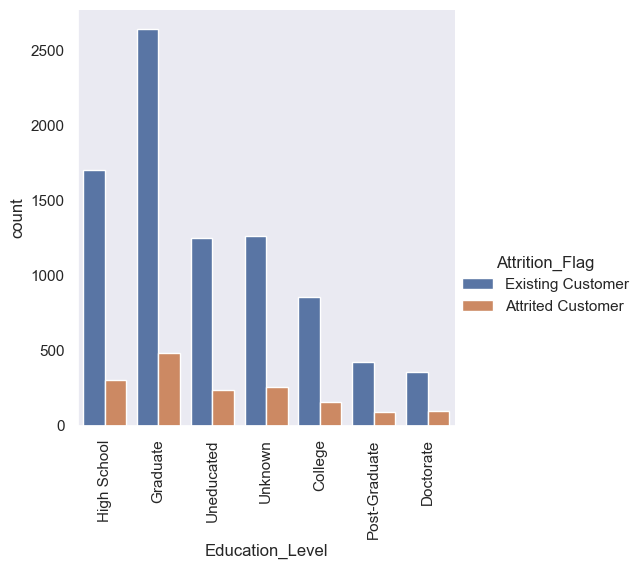

In [248]:
sns.catplot(x="Education_Level", data=df, kind="count", hue='Attrition_Flag')
plt.xticks(rotation = 90)

Card Category Rate shows that Blue card holder are at the most compared to other card category. 

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Blue'),
  Text(1, 0, 'Gold'),
  Text(2, 0, 'Silver'),
  Text(3, 0, 'Platinum')])

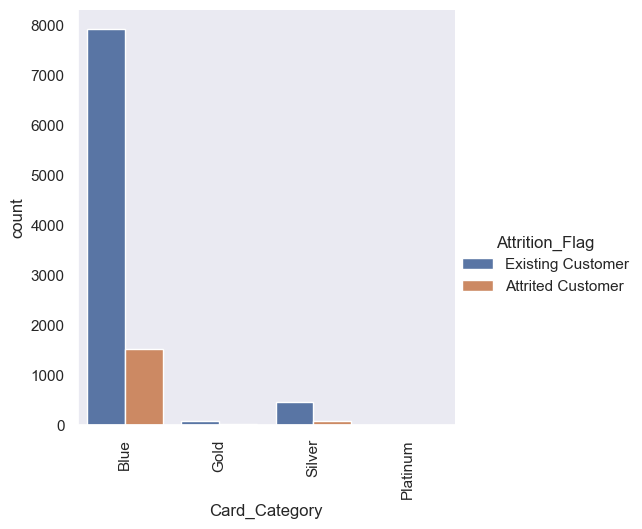

In [249]:
sns.catplot(x="Card_Category", data=df, kind="count", hue='Attrition_Flag')
plt.xticks(rotation = 90)

Credit Card Customer displot that shows the customer age regards to the credit Card Usage.  

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_968/544283996.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Customer_Age'], color='m')


<Axes: xlabel='Customer_Age', ylabel='Density'>

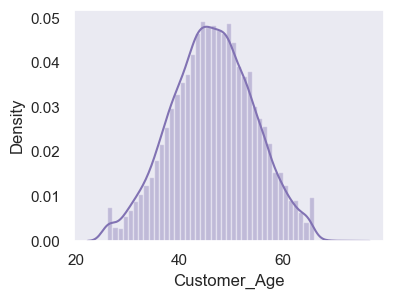

In [261]:
sns.distplot(df['Customer_Age'], color='m')

In [ ]:
Credit Card Cusotmer Displot that shows the count of dependents the customer have and their credit Card Usage according to the number of Dependents.

/var/folders/_6/tsvwl7mj4wq1y64czljdw6bm0000gn/T/ipykernel_968/2371385486.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Dependent_count'], color='m')


<Axes: xlabel='Dependent_count', ylabel='Density'>

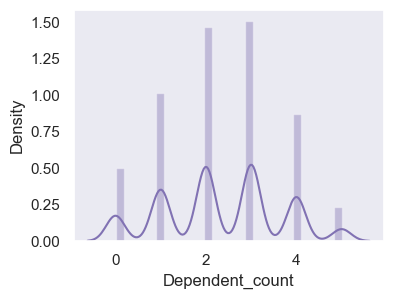

In [262]:
sns.distplot(df['Dependent_count'], color='m')